In [1]:
# import csv
import seaborn as sns
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

from importlib import reload

import drawing as dw
reload(dw)


<module 'drawing' from '/home/xiaoyuz1/amazon_turk/drawing.py'>

In [2]:
fname = '/raid/xiaoyuz1/amazon_turk/2021_pilot/Batch_4637975_batch_results.csv'
df = pd.read_csv(fname)

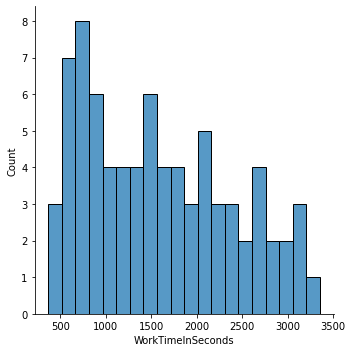

In [8]:
sns.displot(df, x="WorkTimeInSeconds", bins=20)

In [3]:
obj = dw.Drawing(df)

In [10]:
img_save_folder = '/raid/xiaoyuz1/amazon_turk/2021_pilot/Batch_4637975_batch_results'

for data_idx in range(len(obj.data)):
    data_idx = int(data_idx)
    datai = obj.data[data_idx]['data']
    prompt = obj.data[data_idx]['prompt']

    fig = plt.figure(figsize=(5,5))
    plt.xlim(0,400)
    plt.ylim(400,0)
    text = None
    components_accumatlor = []
    for dataij in datai:
        components_accumatlor += dataij['drawing']

    for part_xy_i in components_accumatlor:
        part_xy_i = np.asarray(part_xy_i)
        plt.plot(part_xy_i[:,0], part_xy_i[:,1], c=(0,0,0)) #hue_palette[plot_idx_acc]

    plt.axis('off')
    fig.savefig(os.path.join(img_save_folder, '{}.jpg'.format(data_idx)))
    plt.close()

In [6]:
time_taken = []
for i in range(len(obj.data)):
    time_taken.append(obj.data[i]['time'])

np.argsort(np.array(time_taken))

array([ 25,  26,  12,  11,  20,  19,  98,  79,  80, 115, 116,  44,  43,
        13,  14,   2,   3,  46,  45, 103,  18,  17,  24,  23, 105, 104,
        54,  53, 107, 106,  56,  55,  62,  61,  87,  86,  52,  51,  85,
        84,   9,  10,  73,  74,  83,  38,  37,  88,  89,  68,  67,  57,
        58,  31,  32,  49,  50,  40,  39,  90,  91, 118, 117,  97,  96,
         5,   4,  65,  66, 113, 114,  42,  41,   0,   1,  70,  69, 100,
        99,  95,  94,  35,  36,  30,  29,  15,  16,  59,  60,   8,   7,
        64,  63,  77,  78,  71,  72,  33,  34,  76,  75, 109, 108,  82,
        81,  27,  28, 110, 111,  22,  21, 102, 101, 112,  47,  48,  93,
        92,   6])

In [8]:
np.sort(np.array(time_taken))

array([ 367,  367,  491,  491,  545,  545,  558,  601,  601,  620,  620,
        625,  625,  647,  647,  692,  692,  709,  709,  711,  792,  792,
        793,  793,  800,  800,  851,  851,  904,  904,  913,  913,  948,
        948, 1021, 1021, 1065, 1065, 1120, 1120, 1247, 1247, 1259, 1259,
       1325, 1354, 1354, 1397, 1397, 1414, 1414, 1429, 1429, 1497, 1497,
       1510, 1510, 1538, 1538, 1556, 1556, 1588, 1588, 1651, 1651, 1652,
       1652, 1729, 1729, 1801, 1801, 1907, 1907, 1915, 1915, 2018, 2018,
       2035, 2035, 2091, 2091, 2155, 2155, 2206, 2206, 2214, 2214, 2396,
       2396, 2432, 2432, 2433, 2433, 2496, 2496, 2537, 2537, 2614, 2614,
       2616, 2616, 2701, 2701, 2708, 2708, 2767, 2767, 2809, 2809, 2935,
       2935, 2970, 2970, 3070, 3101, 3101, 3115, 3115, 3357])

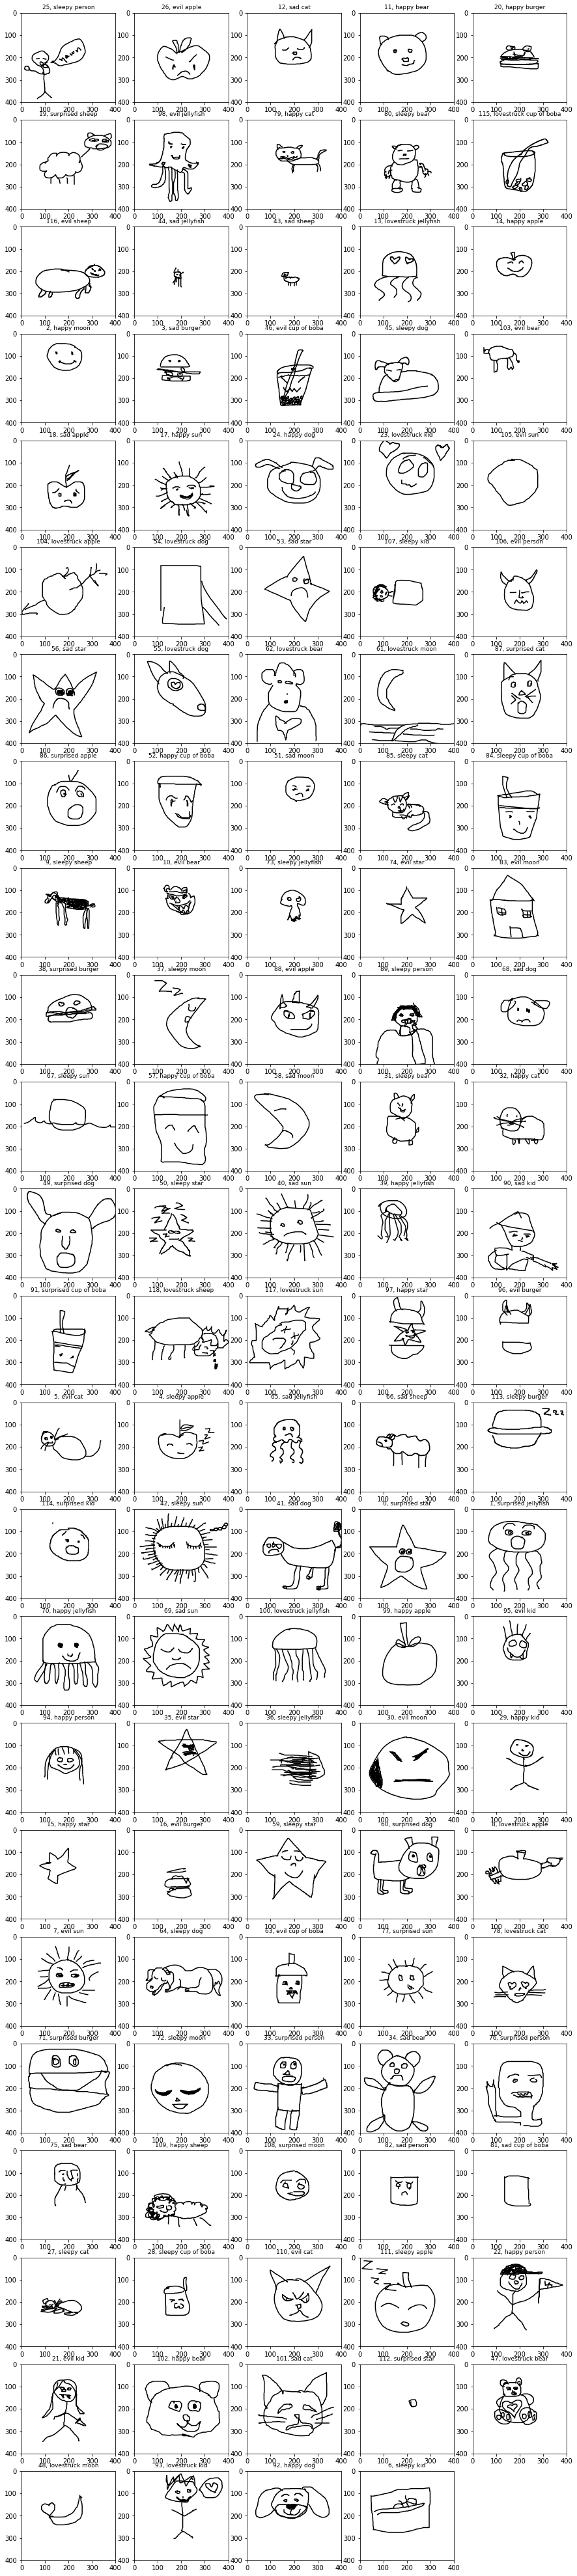

In [13]:
hue_palette = sns.color_palette("husl", 20)
num_plots_per_row = 5
num_rows = int(np.ceil(len(obj.data) / num_plots_per_row))
plt.figure(figsize=(num_plots_per_row * 3, num_rows * 3,))

plot_idx_acc = 1

for data_idx in np.argsort(np.array(time_taken)):
    data_idx = int(data_idx)
    datai = obj.data[data_idx]['data']
    prompt = obj.data[data_idx]['prompt']

    ax = plt.subplot(num_rows, num_plots_per_row , plot_idx_acc)
    plt.xlim(0,400)
    plt.ylim(400,0)
    text = None
    components_accumatlor = []
    for dataij in datai:
        components_accumatlor += dataij['drawing']

    for part_xy_i in components_accumatlor:
        part_xy_i = np.asarray(part_xy_i)
        plt.plot(part_xy_i[:,0], part_xy_i[:,1], c=(0,0,0)) #hue_palette[plot_idx_acc]

    ax.title.set_text(
        "{}, {}".format(data_idx, prompt),
    )
    ax.title.set_fontsize(9)
    # plt.annotate(text, xy=(0,0), backgroundcolor='w', fontsize=9)
    plot_idx_acc += 1        

plt.show()

(array([ 0.,  3.,  2.,  0.,  5.,  1., 11., 11.,  4., 10., 10.,  8.,  8.,
         3.,  4.,  2.,  4.,  6.,  2.,  1.,  2.,  4.,  2.,  2.,  1.,  4.,
         0.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,

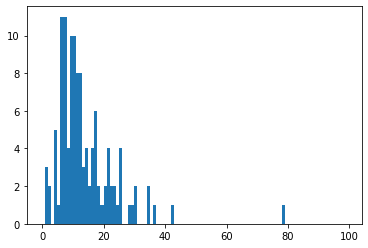

In [13]:
num_strokes = []
for i in range(len(obj.data)):
    num_strokes.append(sum([len(l['drawing']) for l in obj.data[i]['data']]))

plt.hist(num_strokes, bins = np.arange(100))

In [28]:
np.argsort(np.array(num_strokes))

array([112,  15, 105,  74,  67,  81,  73,  99,  58,  54,  16,  38,   0,
       108,  48,  37,  53,  51, 103,   2,  69,  14, 106,  49,  30,  28,
        72,  57,  24,  96,  12,  55, 113,  52,  23,   6,  26, 117,  45,
        68, 102, 114,  39, 104,  11, 111, 109,  65,  61, 100, 107,  13,
        18,  71,  66,  20,  56,  95,   3,  31,  92,  44,  91,  86, 110,
       116, 115,   5,  82,  29, 101,  93,  84,  43,  88,   1,  70,  25,
        75,  34,   4,  87,  94,  97,  59,  22, 118,  83,  78,  19,  98,
        76,  21,  62,  50,  27,  32,  60,  89,  79,  41,  77,  90,  35,
         8,  64,   9,  85,  63,  33,  36,  17,  10,  80,  40,  46,   7,
        47,  42])

In [5]:
all_text = []
for data_idx in obj.data:
    datai = obj.data[data_idx]['data']
    for dataij in datai:
        all_text.append(dataij['annotation'])

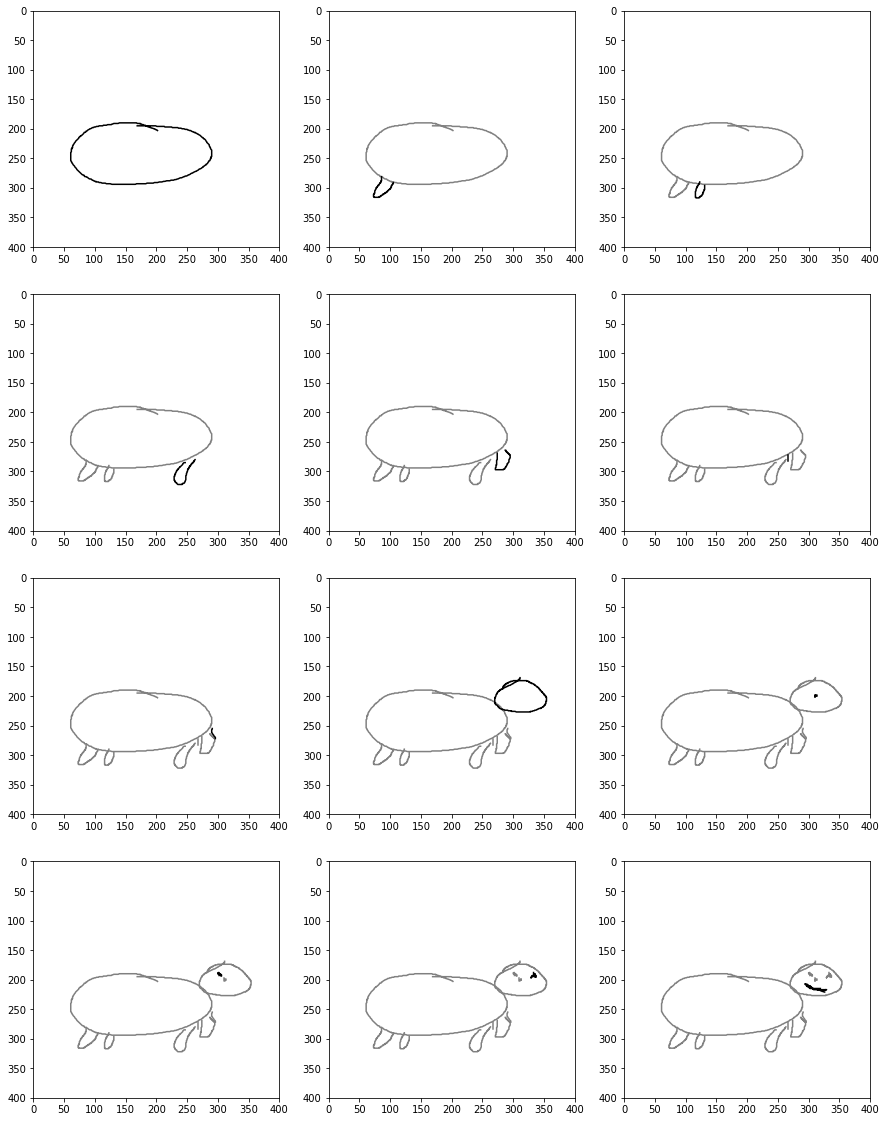

In [5]:
obj.draw_per_stroke(116)

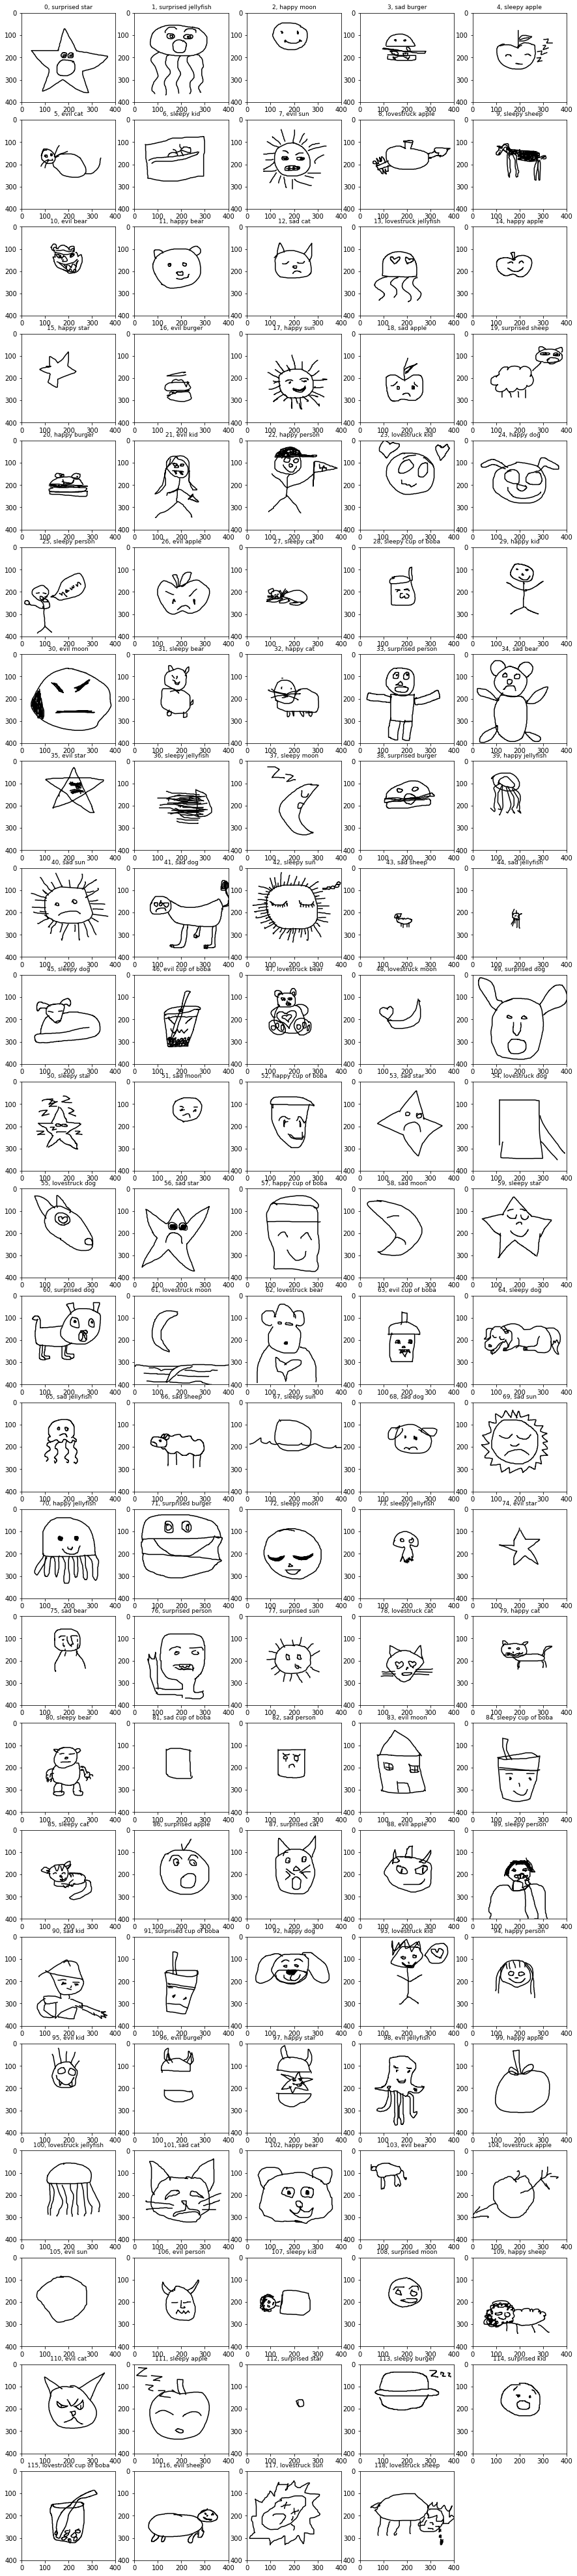

In [6]:
obj.draw_all()

Index in dataframe:  75
Canvas ID:  1


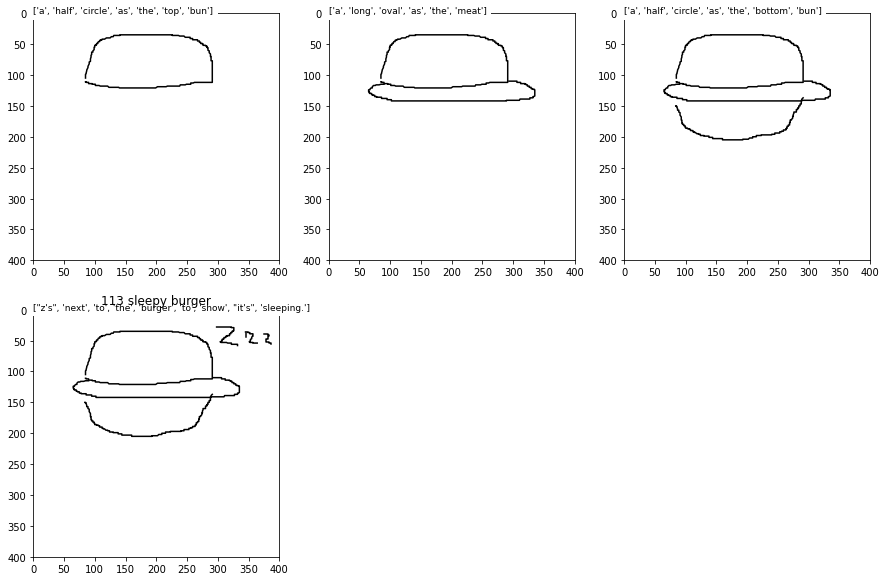

In [19]:
obj.draw(113)

In [54]:
df.iloc[73]['Answer.feedback']

'Na'

In [50]:
df.iloc[43]['Answer.canvasJsonOneStepName_2__1']

'{"data":{"actions":[{"type":0,"actionType":1,"x":223,"y":239},{"type":1,"actionType":1,"x":226,"y":239},{"type":1,"actionType":1,"x":227,"y":239},{"type":1,"actionType":1,"x":228,"y":239},{"type":1,"actionType":1,"x":230,"y":239},{"type":0,"actionType":1,"x":136,"y":241},{"type":1,"actionType":1,"x":138,"y":241},{"type":1,"actionType":1,"x":140,"y":241},{"type":1,"actionType":1,"x":142,"y":241},{"type":1,"actionType":1,"x":143,"y":241},{"type":1,"actionType":1,"x":145,"y":241}],"actionsName":"To draw a eyes and nose of the sleepy dog.","id":"canvas_2_0"}}'

In [38]:
df.iloc[28]['WorkTimeInSeconds']

2614

In [47]:
df.iloc[43].keys()

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.PROMPT01',
       'Input.PROMPT02', 'Answer.canvasJsonOneStepName_0__0',
       'Answer.canvasJsonOneStepName_0__1',
       'Answer.canvasJsonOneStepName_0__2',
       'Answer.canvasJsonOneStepName_0__3',
       'Answer.canvasJsonOneStepName_0__4',
       'Answer.canvasJsonOneStepName_1__0',
       'Answer.canvasJsonOneStepName_1__1',
       'Answer.canvasJsonOneStepName_1__10',
       'Answer.canvasJsonOneStepName_1__11',
       'Answer.canva

In [24]:
df.iloc[38]['WorkerId']

'A24ZP6TOKYBSQS'

In [2]:
df_res = pd.read_csv("/raid/xiaoyuz1/amazon_turk/2021_pilot/Dec_28_Amazon_Turk_run.csv")

In [27]:
ok_count = 0
multiple_count = 0
one_step_count = 0
illustrate_count = 0

ok_prompts = []

for idx, l in enumerate(df_res['problem']):
    something = 0
    if 'OK' in l:
        ok_count += 1
        ok_prompts.append(idx)
        something += 1
    if 'multiple' in l:
        multiple_count += 1
        something += 1
    if '1 step' in l:
        one_step_count += 1
        something += 1
    if 'illu' in l:
        illustrate_count += 1
        something += 1
    
    if something < 1:
        print(l)
    else:
        print(something)
        

print("# OK: ", ok_count)
print("# Multiple objects in 1 step: ", multiple_count)
print("# 1 step drawing: ", one_step_count)
print("# illustration ambiguity: ", illustrate_count)

1
1
1
1
plural
1
1
1
1
2
1
1
1
1
1
2
2
1
1
1
1
1
1
1
1
1
2
2
2
1
1
2
2
1
1
2
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
unfinished?
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
draw this inside the first one
1
1
1
1
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
# OK:  62
# Multiple objects in 1 step:  22
# 1 step drawing:  21
# illustration ambiguity:  28


In [17]:
62 + 22 + 21 + 28

133

In [24]:
62 / 118

0.5254237288135594

In [26]:
77 * 2 - 118

36

In [31]:
ok_prompts_texts = []
for idx in ok_prompts:
    ok_prompts_texts.append(df_res.iloc[idx]['prompt'])

surprised star
surprised jellyfish
lovestruck apple
happy bear
sad cat
lovestruck jellyfish
happy apple
surprised sheep
happy burger
evil kid
happy person
lovestruck kid
happy dog
sleepy person
evil apple
surprised person
sad bear
evil star
sleepy mooon
surprised burger
sad sun
sleepy dog
evil cup of boba
lovestruck moon
surprised dog
sleepy star
sad star
lovestruck dog
sad star
happy cup of boba
sad moon
sleepy star
surprised dog
lovestruck bear
sad jellyfish
sad sheep
sleepy sun
sad dog
sad sun
happy jellyfish
surprised burger
sleepy moon
happy cat
sleepy bear
surprised cat
evil apple
sleepy person
happy dog
happy kid
happy person
evil kid
sad cat
happy bear
lovestruck apple
evil person
sleepy kid
surprised moon
happy sheep
evil cat
sleepy apple
sleepy burger
surprised kid
